## Discovering impact of the Series 'Euphoria' through NLP
### Analysis based on posts and comments on the `r/euphoria` subreddit  

#### 2. EDA

Goal: Summarize main characteristics of dataset  
I: corpus and TDM  
O: trands in data if it makes sense  

Some ideas:  
- top words for each post
- vocabulary
- profanity
- specific drug frequency 

`wordcloud` & `matplotlib`

In [53]:
# import data
import pandas as pd

data = pd.read_pickle('../dat/tdm_s1.pkl')
# rename rows
# data = data.rename(index = {0: 'A', 1: 'B', 2: 'C'})
data

,aback,abandon,abdoman,abdomen,ability,able,abnormality,abortion,abortionrue,abruptly,...,yru,yt,yup,zack,zen,zendaya,zendayas,zer,zero,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3656,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3657,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3658,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**3,661 comments(documents)**

In [54]:
# get the top 30 words

def get_top(df):
    freq = []
    for word in df.columns:
        freq.append((word, df[word].sum()))
    freq = sorted(freq, key=lambda x: x[1], reverse=True)
    return freq[:30]

In [55]:
get_top(data)

[('rue', 2095),
 ('think', 1442),
 ('jule', 1404),
 ('like', 1298),
 ('nate', 801),
 ('know', 767),
 ('feel', 559),
 ('love', 461),
 ('character', 458),
 ('people', 419),
 ('lexi', 418),
 ('want', 405),
 ('thing', 397),
 ('good', 367),
 ('scene', 363),
 ('way', 359),
 ('drug', 354),
 ('end', 354),
 ('relationship', 323),
 ('fez', 316),
 ('sem', 308),
 ('time', 301),
 ('look', 297),
 ('friend', 283),
 ('maybe', 261),
 ('don', 260),
 ('tell', 257),
 ('stil', 255),
 ('happen', 248),
 ('come', 240)]

Thinking: if all three posts have the same top words - it may not provide any meaningul insight. Should write a logic to add words to the stopwords list if the word is common for all posts

In [56]:
import spacy
nlp = spacy.load('en_core_web_sm')
sw_spacy = nlp.Defaults.stop_words | {'rt', 'via', '…'}

In [57]:
# add_stopwords = [word for word, count in Counter(words).most_common() if count == 3]
add_stopwords = ['i', 'just','did', 'ab', 'amp', 'ml', 'xb','abc', 'abcb', 'abcny', 'abd', 'abdabca', 'fs', 
                  'zpqxhxhzanapjsjbf', 'zqcsrpwsge', 'zqnuhckwdqwrhkuo', 'zs', 'zshwbhethehenozxfyqg',
                  'zsmkbrmwngzsibrntkt', 'zy', 'zwhnrmujykdxmntiub', 'afqjcnguytghbsuvixmglpwzqbg', 'ebecadcbdfcbafbdb',
                  'abfbmltmqspf', 'abfafebfbad', 'episode', 'season', 'lol', 's']

# using spacy stopwords instead of sklearn
stop_words = sw_spacy.union(add_stopwords)
# from sklearn.feature_extraction import text
# stop_words = text.ENGLISH_STOP_WORDS.union(add_stopwords)

In [58]:
# update TDM with new list of stop words
from sklearn.feature_extraction.text import CountVectorizer

# read cleaned data
corpus = pd.read_pickle('../dat/corpus_s1.pkl')

In [59]:
# recreate TDM
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(corpus[0])
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = corpus.index

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


In [60]:
# pickle TDM
import pickle
pickle.dump(cv, open('../dat/cv_stop_s1.pkl', 'wb'))
data_stop.to_pickle('../dat/tdm_stop_s1.pkl')

**Visualize**

In [61]:
# create a list of all the words in all the comments
comment_word_ls = []
for comment in corpus[0]:
    words = comment.split()
    for word in words:
        comment_word_ls.append(word)

In [62]:
# remove any stop words from the list of words
comment_word_ls_stop = [word for word in comment_word_ls if word not in stop_words]

In [63]:
comment_words = ' '.join(comment_word_ls_stop)

In [64]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color='white',colormap = 'Dark2', max_font_size=40, random_state=2022, max_words=150)

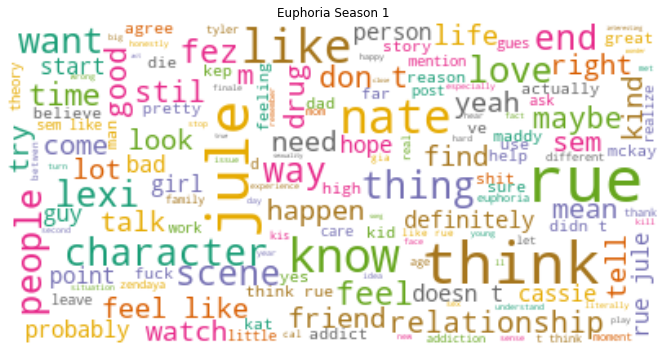

In [65]:
plt.rcParams['figure.figsize'] = (16, 6)
wc.generate(comment_words)
plt.title('Euphoria Season 1')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('../img/wc_s1.png', dpi = 300)
plt.show()

#### 2.2 Vocabulary

In [66]:
data.head()

,aback,abandon,abdoman,abdomen,ability,able,abnormality,abortion,abortionrue,abruptly,...,yru,yt,yup,zack,zen,zendaya,zendayas,zer,zero,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
term_document_matrix = data.T
term_document_matrix['total_count'] = term_document_matrix.sum(axis=1)

In [68]:
# Top 100 words 
term_document_matrix = term_document_matrix.sort_values(by ='total_count',ascending=False)[:100] 

# Print the first 10 rows 
print(term_document_matrix.drop(columns=['total_count']).head(10))

           0     1     2     3     4     5     6     7     8     9     ...  \
rue           0     0     0     0     0     0     0     0     0     0  ...   
think         0     1     0     0     0     0     0     0     2     0  ...   
jule          0     0     1     0     0     0     0     0     0     0  ...   
like          0     0     0     0     0     0     0     0     0     1  ...   
nate          0     0     0     0     0     0     0     0     0     0  ...   
know          0     0     0     0     0     0     0     0     0     0  ...   
feel          0     0     0     0     0     0     0     0     0     0  ...   
love          0     0     0     0     0     0     0     0     0     0  ...   
character     0     0     0     0     0     0     0     0     0     0  ...   
people        0     0     0     0     0     0     0     0     0     0  ...   

           3650  3651  3652  3653  3654  3655  3656  3657  3658  3659  
rue           1     1     1     1     3     4     1     1     1     1

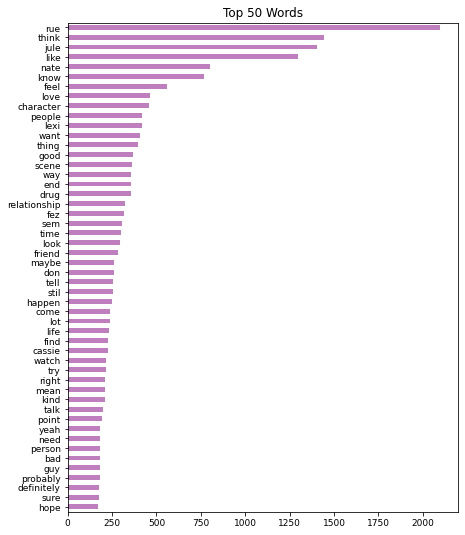

In [69]:
# vertical bar plot of top 50 in ascending order
df_sorted = term_document_matrix.sort_values(by ='total_count', ascending= False)[0:50]
df_sorted['total_count'].plot(kind='barh', figsize=(7,9), color='purple', 
                              alpha=0.5, title='Top 50 Words', 
                                legend=False, fontsize=9).invert_yaxis()

**Looking at the frequency of certain drug related words**

In [70]:
# isolate drug words
drug_words = ['drug', 'drugs', 'addict', 'addiction', 'opiate', 'opioids', 'dope', 'marijuana'
                   'weed', 'zoloft', 'xanax', 'high', 'dose', 'trigger', 'triggering', 'relapse', 'sober', 'sobriety','fentanyl',
                   'heroin', 'crack', 'cocaine', 'amphetamine', 'speed', 'acid', 'ecstasy', 'lsd', 'shrooms',
                   'psychadelics', 'narcotic', 'rehab', 'recovery', 'treatment', 'methadone', 'naloxone']

# filter data if any column is in drug_words
filter_ls = [data_stop.columns[i] in drug_words for i in range(len(data_stop.columns))]
drug_cols = data_stop[data_stop.columns[filter_ls]]
# arrange columns by values
drug_cols = drug_cols.sort_values(by=drug_cols.columns[0], ascending=False)
drug_cols

,acid,addict,addiction,amphetamine,cocaine,crack,dope,dose,drug,ecstasy,...,lsd,narcotic,opiate,recovery,rehab,relapse,sober,sobriety,treatment,xanax
3189,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1225,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1226,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1227,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='rue', ylabel='addiction'>

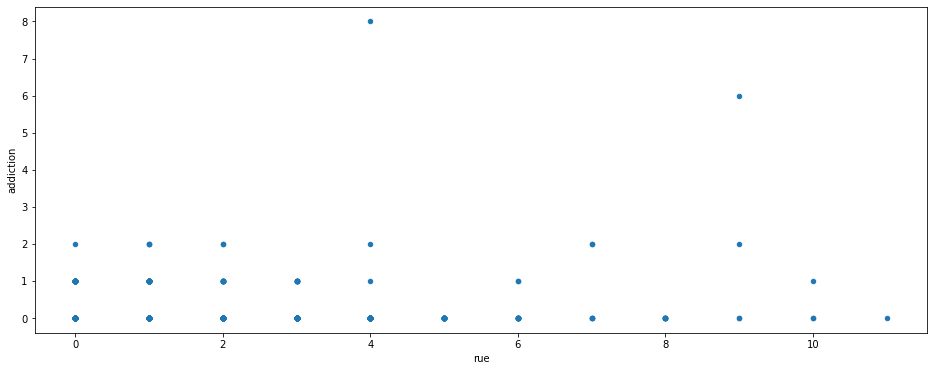

In [71]:
# Locate rue and elliot in the documents, example
term_document_matrix.loc[['rue', 'addiction']].T

# Create a scatterplot of the frequencies
term_document_matrix.drop(columns=['total_count']).T.plot.scatter(x='rue', y='addiction')

<AxesSubplot:xlabel='rue', ylabel='jule'>

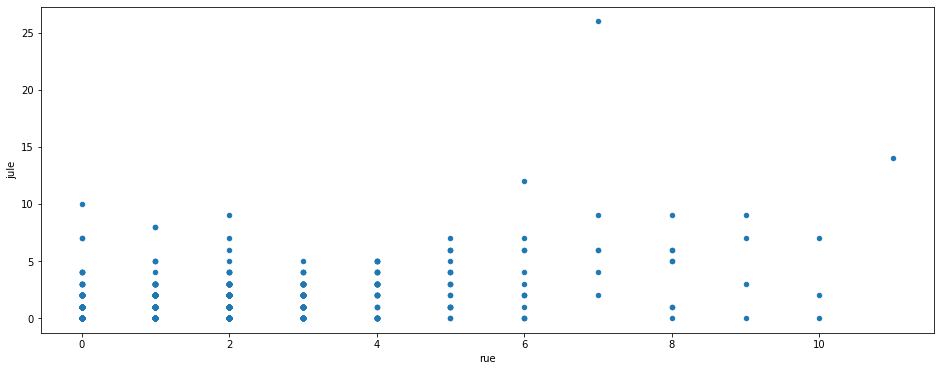

In [73]:
# let's try rue and fentanyl
term_document_matrix.loc[['rue', 'jule']].T

# Create a scatterplot of the frequencies
term_document_matrix.drop(columns=['total_count']).T.plot.scatter(x='rue', y='jule')

this is a scatterplot of frequencies for rue and elliot across 100 documents(comments).

**Cosine Similarity**

In [23]:
# keep TDM only with the top 100 words - full vocabulary takes too long
# term_document_matrix = data.T

In [24]:
# Activate math
# import math

# # Define a cosine similarity function
# def cosine_similarity(a,b):
#     "compute cosine similarity of v1 to v2: (a dot b)/{||a||*||b||)"
#     sumxx, sumxy, sumyy = 0, 0, 0
#     for i in range(len(a)):
#         x = a[i]; y = b[i]
#         sumxx += x*x
#         sumyy += y*y
#         sumxy += x*y
#     return sumxy/math.sqrt(sumxx*sumyy)

In [25]:
# cosine similarity function for all comments
# account for zero values to avoid division by zero

# from sklearn.metrics.pairwise import cosine_similarity

# # compute cosine similarity between all comments
# # using term_document_matrix

# def comment_sim(mat):
#     # pair wise similarity between all comments
#     sim = cosine_similarity(mat)
#     # create a dataframe of the similarities
#     sim_df = pd.DataFrame(sim, columns=mat.index, index=mat.index)
#     # return the dataframe
#     return sim_df

In [26]:
# test = comment_sim(term_document_matrix)

In [27]:
# cosine similarity heat map
# import matplotlib.pyplot as plt

# rename 
# documents = ['com ' + str(i) for i in range(len(term_document_matrix.columns))]

In [28]:
# create a heatmap of the similarities

# fig, ax = plt.subplots(figsize=(10,10))
# ax.set_xticks(range(len(documents)))
# ax.set_yticks(range(len(documents)))
# ax.set_xticklabels(documents, rotation=90)
# ax.set_yticklabels(documents)
# plt.imshow(test, cmap='hot', interpolation='nearest')
# plt.colorbar()
# plt.show()

---

Re-attempt at TDM, CS, and heatmap but with subset of original data

In [74]:
# Count Vectorizer
vect = CountVectorizer(stop_words=stop_words)  
vects = vect.fit_transform(corpus[0])

# Select the first fifty rows from the data set
td = pd.DataFrame(vects.todense()).iloc[:50]  
td.columns = vect.get_feature_names()
term_document_matrix2 = td.T
term_document_matrix2.columns = ['Doc '+str(i) for i in range(1, 51)]
term_document_matrix2['total_count'] = term_document_matrix2.sum(axis=1)

# Top 100 words 
term_document_matrix2 = term_document_matrix2.sort_values(by ='total_count',ascending=False)[:100] 

# Print the first 10 rows 
print(term_document_matrix2.drop(columns=['total_count']).head(10))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


              Doc 1  Doc 2  Doc 3  Doc 4  Doc 5  Doc 6  Doc 7  Doc 8  Doc 9  \
rue               0      0      0      0      0      0      0      0      0   
jule              0      0      1      0      0      0      0      0      0   
think             0      1      0      0      0      0      0      0      2   
like              0      0      0      0      0      0      0      0      0   
love              0      0      0      0      0      0      0      0      0   
know              0      0      0      0      0      0      0      0      0   
relationship      0      0      0      0      0      0      0      0      0   
addict            0      0      0      0      0      0      0      0      0   
life              0      0      0      0      0      0      0      0      0   
stil              0      0      0      0      0      0      0      0      0   

              Doc 10  ...  Doc 41  Doc 42  Doc 43  Doc 44  Doc 45  Doc 46  \
rue                0  ...       1       0       2    

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [75]:
# Activate math
import math

# Define a cosine similarity function


def cosine_similarity(a, b):
    "compute cosine similarity of v1 to v2: (a dot b)/{||a||*||b||)"
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(a)):
        x = a[i]
        y = b[i]
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    if sumxx == 0 or sumyy == 0:
        return 0
    else:
        return sumxy/math.sqrt(sumxx*sumyy)


In [76]:
# Activate numpy
import numpy as np 

# Save the similarity index between the documents
def pair(s):
    for i, v1 in enumerate(s):
        for j in range(i+1, len(s)):
            yield [v1, s[j]]

In [77]:
#  calculate similiarity index for each document
dic={} 
for (a,b) in list(pair(term_document_matrix2.columns)):
  dic[(a,b)] = cosine_similarity(term_document_matrix2[a].tolist(), term_document_matrix2[b].tolist())

# Print the cosine similarity index
# print(dic)

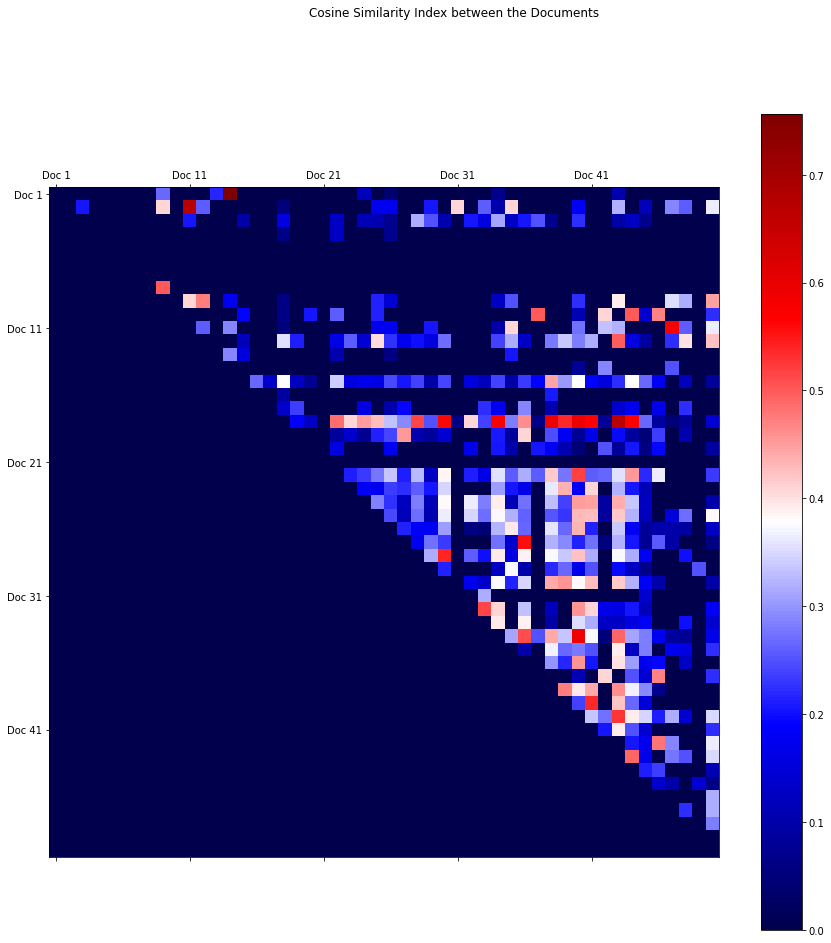

In [78]:
documents= ['Doc ' + str(i) for i in range(1, 51)]
final_df = pd.DataFrame(np.asarray([[(dic[(x,y)] if (x,y) in dic else 0) for y in documents] for x in documents]))
final_df.columns =  documents
final_df.index = documents 

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,15))
ax.set_xticks(np.arange(len(documents)))
ax.set_yticks(np.arange(len(documents)))
ax.set_xticklabels(documents)
ax.set_yticklabels(documents)
# for (i, j), z in np.ndenumerate(final_df):
#   if z != 0 :
#     ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center',
#             bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
#   else:
#     None
fig.suptitle('Cosine Similarity Index between the Documents')
# show legend
ax.matshow(final_df, cmap='seismic')
fig.colorbar(mappable=ax.matshow(final_df, cmap='seismic'))
plt.show()

In [79]:
# get the set of documents that are the most similar together
# score > .675

sim_docs = []
for i in range(len(final_df.columns)):
    for j in range(i+1, len(final_df.columns)):
        if final_df.iloc[i,j] > .675:
            sim_docs.append((final_df.columns[i], final_df.columns[j]))

In [80]:
print(sim_docs)

[('Doc 1', 'Doc 14')]


In [36]:
# looks like we have some very similar documents, 14, 43
# lets look at their similarities
# subset the dataframe to only include the document sets in sim_docs and their similarities

# first doc in each dictionary
rows = [i[0] for i in sim_docs]
cols = [i[1] for i in sim_docs]
sim_docs_df = final_df.loc[rows, cols]
sim_docs_df

,Doc 14,Doc 49,Doc 30,Doc 11,Doc 50,Doc 50
Doc 1,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000
Doc 5,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000
Doc 6,0.000000,0.000000,0.688247,0.000000,0.328798,0.328798
Doc 8,0.000000,0.000000,0.000000,0.676123,0.735215,0.735215
Doc 8,0.000000,0.000000,0.000000,0.676123,0.735215,0.735215
Doc 11,0.169031,0.000000,0.000000,0.000000,0.683507,0.683507


In [81]:
# let's grab the original comment for the documents we want
# for doc30, doc27, doc26, doc25

doc_1 = corpus[0][0]
doc_14 = corpus[0][13]
doc_47 = corpus[0][46]
doc_18 = corpus[0][17]
doc_26 = corpus[0][25]

print("**Documents 1 and 14**: \n", '--', doc_1, '\n' '--', doc_14)
print('**Documents 14 and 47**: \n', '--', doc_14, '\n', '--', doc_47)
print('**Documents 18 and 26**: \n','--', doc_18, '\n', '--', doc_26)

**Documents 1 and 14**: 
 -- she say when she be in the hospital she pretend the beeping of machine be bird maybe it be a hint that she be not dead and in the hospital 
-- no do you notice the bird sound in the end of the musical she s not dead she be hear the bip of the machine in the hospital
**Documents 14 and 47**: 
 -- no do you notice the bird sound in the end of the musical she s not dead she be hear the bip of the machine in the hospital 
 -- I think the complaint about the dancing and the choir would ve be stop if there have be a brief shot at the very end for a couple of second of she just lay on the bed high off her ass stare at the ceiling
**Documents 18 and 26**: 
 -- I be neutral on they from the begining I think that jule be definitely a decent friend but not in a place to be the rock that rue need I stil care about jule but I have no desire to see rue with her romanticaly rue will never get well with the wish washy way jule treat she she sem to care genuinely about rue 